# Условное математическое ожидание

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Условное-математическое-ожидание" data-toc-modified-id="Условное-математическое-ожидание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Условное математическое ожидание</a></span><ul class="toc-item"><li><span><a href="#Неформальное-понятие-и-геометрическая-аналогия" data-toc-modified-id="Неформальное-понятие-и-геометрическая-аналогия-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Неформальное понятие и геометрическая аналогия</a></span></li><li><span><a href="#Определение-и-свойства" data-toc-modified-id="Определение-и-свойства-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Определение и свойства</a></span></li><li><span><a href="#Условная-дисперсия" data-toc-modified-id="Условная-дисперсия-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Условная дисперсия</a></span></li><li><span><a href="#Условное-распределение" data-toc-modified-id="Условное-распределение-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Условное распределение</a></span></li></ul></li><li><span><a href="#Оптимальная-оценка" data-toc-modified-id="Оптимальная-оценка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Оптимальная оценка</a></span><ul class="toc-item"><li><span><a href="#Теорема-об-оптимальной-оценке" data-toc-modified-id="Теорема-об-оптимальной-оценке-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Теорема об оптимальной оценке</a></span></li><li><span><a href="#Кривая-регрессии" data-toc-modified-id="Кривая-регрессии-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Кривая регрессии</a></span></li></ul></li><li><span><a href="#Маргинальные-и-условные-распределения" data-toc-modified-id="Маргинальные-и-условные-распределения-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Маргинальные и условные распределения</a></span><ul class="toc-item"><li><span><a href="#Маргинальные-(частные)-распределения" data-toc-modified-id="Маргинальные-(частные)-распределения-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Маргинальные (частные) распределения</a></span></li><li><span><a href="#Условные-распределения" data-toc-modified-id="Условные-распределения-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Условные распределения</a></span></li></ul></li><li><span><a href="#Задания" data-toc-modified-id="Задания-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Задания</a></span></li><li><span><a href="#Литература" data-toc-modified-id="Литература-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Литература</a></span></li></ul></div>

In [1]:
# Imports
import sys
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Styles, fonts
import matplotlib
matplotlib.rcParams['font.size'] = 12
from matplotlib import cm # Colormaps

import seaborn
seaborn.set_style('whitegrid')

from IPython.display import Image
im_width = 1000

In [3]:
from gauss_distrib_util import univariate_normal
from gauss_distrib_util import multivariate_normal
from gauss_distrib_util import generate_surface

---

## Условное математическое ожидание

### Неформальное понятие и геометрическая аналогия

Для начала введём понятие *условного математического ожидания* неформально.

Пусть $\xi$ и $\eta$ &mdash; две случайные величины на некотором вероятностном пространстве.
Пусть $L = L(\xi)$ &mdash; множество, в котором собраны все случайные величины $g(x)$, являющиеся функциями от $\xi$. \
Среди элементов множества $L$ мы хотим найти случайную величину $\hat{\eta}$ &laquo;наиболее похожую&raquo; на $\eta$.

Такую случайную величину $\hat{\eta}$ будем называть *условным математическим ожиданием $\eta$ относительно $\xi$* и обозначать $\mathrm{E}(\eta|\xi)$.


&laquo;Похожесть&raquo; двух случайных величин $\eta$ и $\hat{\eta}$ формализуем с помощью процедуры ортогонального проектирования. Для этого введём скалярное произведение двух случайных величин $(\xi, \eta) = \mathrm{cov}(\xi, \eta)$.

Тогда условное математическое ожидание $\mathrm{E}(\eta|\xi)$ случайной величины $\eta$ относительно $\xi$ можно представлять себе как результат *ортогонального проектирования* случайной величины $\eta$ на пространство $L(\xi)$.

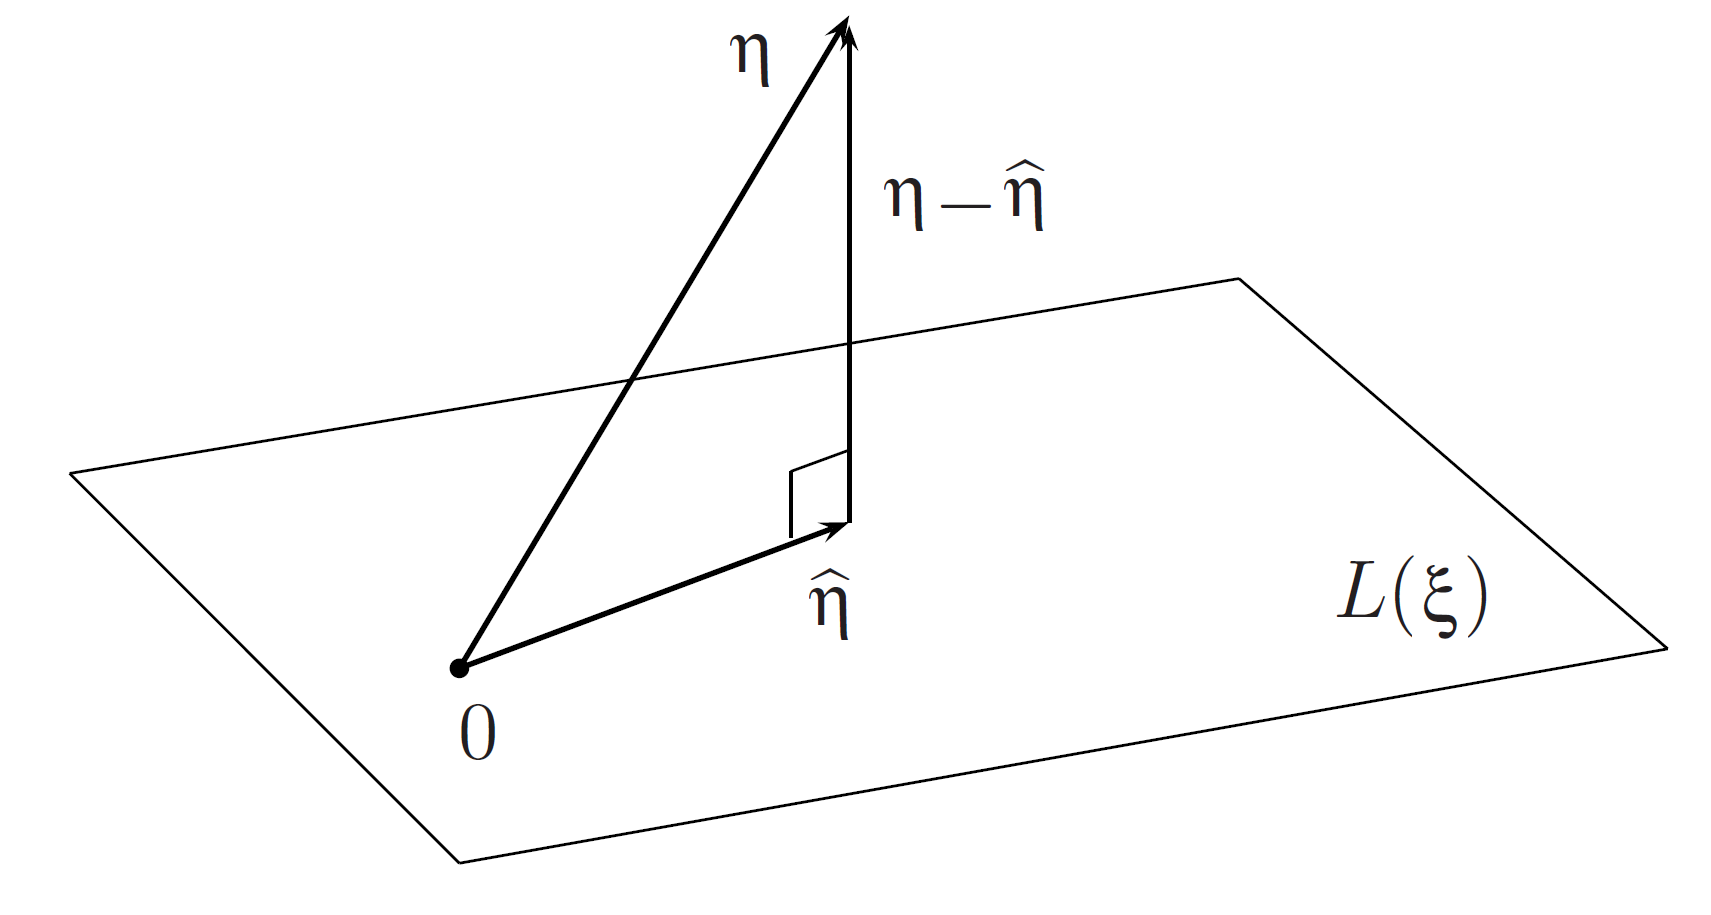

In [4]:
display(Image('./pix/CondExpect.png', width=0.50*im_width))

Результат проектирования &mdash; такая случайная величина $\mathrm{E}(\eta|\xi) = \hat{\eta}$ из $L$, для которой выполнено основное свойство ортопроекции: её разность с $\eta$ ортогональна всем элементам $L$.
Ортогональность означает, что для любой $g(\xi) \in L$ скалярное произведение $(\eta - \hat{\eta}, g(\xi))$ обращается в нуль, т.е.
$$
  \mathrm{cov}\left[(\eta - \hat{\eta}) \cdot g(\xi) \right] = 0 \quad \mathrm{или} \quad \mathrm{cov}\left[ \eta \cdot g(\xi) \right] = \mathrm{cov}\left[ \hat{\eta} \cdot g(\xi) \right].
$$

### Определение и свойства

**Определение.**
Пусть $L = L(\xi)$ &mdash; множество всех функций от случайной величины $\xi$.
*Условным математическим ожиданием* $\mathrm{E}(\eta|\xi)$ называется *случайная величина* $\hat{\eta} \in L$, удовлетворяющая тождеству ортопроекции:
$$
  \mathrm{cov}\left[ \eta \cdot g(\xi) \right] = \mathrm{cov}\left[ \hat{\eta} \cdot g(\xi) \right] \quad \forall g(\xi) \in L.  
$$

**Свойства:**

1. УМО &mdash; это случайная величина
1. если $\xi$ и $\eta$ независимы, то $\mathrm{E}(\eta|\xi) = \mathrm{E}(\eta)$
1. линейность: $\mathrm{E}(\eta_1 + \eta_2|\xi) = \mathrm{E}(\eta_1|\xi) + \mathrm{E}(\eta_2|\xi)$, в частности, $\mathrm{E}(a\eta + b|\xi) = a\mathrm{E}(\eta|\xi) + b$
1. известные величины можно выносить из-под знака математического ожидания: $\mathrm{E}(f(\xi) \cdot \eta|\xi) = f(\xi) \cdot \mathrm{E}(\eta|\xi)$, в частности, $\mathrm{E}(f(\xi)|\xi) = f(\xi)$
1. формула полного мат. ожидания: $\mathrm{E}\left[ \mathrm{E}(\eta|\xi) \right] = \mathrm{E}(\eta)$ (*Adam's law*)
1. ! $\min\limits_{g(\xi) \in L} \mathrm{E}[\eta - g(\xi)]^2 = \mathrm{E}[\eta - \hat{\eta}]^2$

### Условная дисперсия

**Определение.** Условной дисперсией (скедастикой) $\mathrm{D}(\eta|\xi)$ называется *случайная величина*, вычисляемая по формуле
$$
  \mathrm{D}(\eta|\xi) = \mathrm{E}\left[ (\eta - \mathrm{E}(\eta|\xi))^2 |\xi \right].
$$

**Свойства:**

1. $\mathrm{D}(a\xi + b) = a^2 \mathrm{D}(\xi|\eta)$
1. $\mathrm{D}(\eta|\xi) = \mathrm{E}(\eta^2|\xi) - (\mathrm{E}(\eta|\xi))^2$
1. $\mathrm{D}(f(\xi) \cdot \eta|\xi) = (f(\xi))^2 \cdot \mathrm{D}(\eta|\xi)$
1. формула полной дисперсии: $\mathrm{D}(\eta) = \mathrm{E}\left[ \mathrm{D}(\eta|\xi) \right] + \mathrm{D}\left[ \mathrm{E}(\eta|\xi) \right]$ (*Eve's law*)

**Пример.**

Рассмотрим выборку данных, состоящую из нескольких частей.
Например, рост людей в различных городах.
Пусть нам известно математическое ожидание и дисперсия каждой части.
Требуется найти математическое ожидание и дисперсию всей выборки.

In [5]:
def get_bins(X):
    return 3*int(X.max()-X.min())

In [6]:
N = int(1e4)
k1, k2 = 3, 1
m1, s1 = 170., 4.
X1 = np.random.normal(loc=m1, scale=s1, size=k1*N)
m2, s2 = 180., 1.
X2 = np.random.normal(loc=m2, scale=s2, size=k2*N)

print(f'm1 = {np.mean(X1):.2f}, D1 = {np.var(X1):.2f}')
print(f'm2 = {np.mean(X2):.2f}, D2 = {np.var(X2):.2f}')

m1 = 169.98, D1 = 15.98
m2 = 180.00, D2 = 1.00


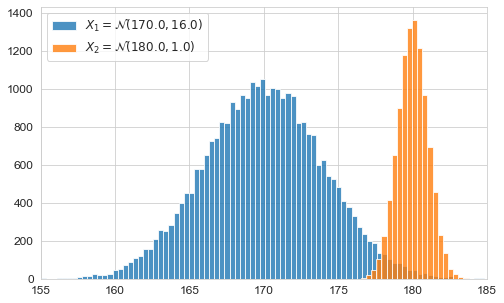

In [7]:
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(1,1,1)
plt.hist(X1, bins=get_bins(X1), alpha=0.8, label=f"$X_1=\mathcal{{N}}({m1}, {s1**2})$")
plt.hist(X2, bins=get_bins(X2), alpha=0.8, label=f"$X_2=\mathcal{{N}}({m2}, {s2**2})$")

plt.xlim([155, 185])
plt.legend()
plt.show()

In [8]:
X3 = np.concatenate([X1,X2])
print(f'm3_f = {np.mean(X3):.2f}, D3_f = {np.var(X3):.2f}')

m3_f = 172.48, D3_f = 31.05


In [9]:
w1, w2 = k1/(k1+k2), k2/(k1+k2)
m3 = w1*m1 + w2*m2
D3 = w1*s1**2 + w2*s2**2 + w1*(m1-m3)**2 + w2*(m2-m3)**2
s3 = D3**0.5
print(f'm3_t = {m3:.2f}, D3_t = {D3:.2f}')

m3_t = 172.50, D3_t = 31.00


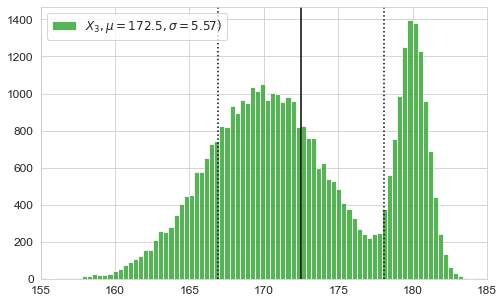

In [10]:
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(1,1,1)
plt.hist(X3, bins=get_bins(X3), color=cm.tab10(2), alpha=0.8,
         label=f"$X_3, \mu={m3}, \sigma={s3:.3})$")
plt.axvline(m3, c='k')
plt.axvline(m3-s3, c='k', ls=':')
plt.axvline(m3+s3, c='k', ls=':')

plt.xlim([155, 185])
plt.legend()
plt.show()

### Условное распределение

Пусть ($\xi$, $\eta$) &mdash; пара случайных величин с плотностью совместного распределения $f_{\xi,\eta}(x, y)$.
Пусть $f_{\xi}(x)$ и $f_{\eta}(y)$ &mdash; плотности распределения вероятностей случайных величин $\xi$ и $\eta$.

Тогда плотность условного распределения вероятностей можно определить с помощью формулы
$$
  f_{\eta|\xi}(y|x) = \frac{f_{\xi,\eta}(x, y)}{f_{\xi}(x)} = \frac{f_{\xi,\eta}(x, y)}{\int\limits_{-\infty}^{\infty} f_{\xi,\eta}(x,y) dy}.
$$

Условное математическое ожидание можно вычислить по формуле
$$
  \mathrm{E}(\eta|\xi=x) = \int\limits_{-\infty}^{\infty} y f_{\eta|\xi}(y|x) dy.
$$

Теория условных математических ожиданий позволяет дать обобщение теоремы Байеса, находящей применения в статистике.
Обобщённая теорема Байеса, являющаяся одним из основных средств при &laquo;байесовском подходе&raquo; в математической статистике, даёт ответ на вопрос о том, как перераспределяется наше знание о распределении *случайной величины* $\theta$ в зависимости от результатов наблюдений над статистически с ней связанной случайной величиной $\xi$.

> Ниже будет рассматриваться ещё одно применение понятия условного математического ожидания в задачах оценивания *неизвестного параметра* $\theta$ по результатам наблюдений.
(Подчеркнём, что, в отличие от рассмотренного выше случая, где $\theta$ &mdash; случайная величина, сейчас $\theta$ будет просто некоторым параметром из *a priori* данного параметрического множества $\Theta$.)

---

## Оптимальная оценка

### Теорема об оптимальной оценке

Убедительной иллюстрацией полезности понятия условного математического ожидания является его применение
к решению следующей задачи, относящейся к *теории оценивания*.

Пусть $(\xi, \eta)$ &mdash; пара случайных величин, из которых $\xi$ наблюдаема, а $\eta$ наблюдению не подлежит.
Спрашивается, как по значениям наблюдений над $\xi$ &laquo;оценить&raquo; ненаблюдаемую компоненту $\eta$?

Чтобы сделать эту задачу более определённой, введем понятие оценки.
Случайную величину $\varphi(\xi)$ будем называть *оценкой* $\eta$ по $\xi$, а величину $\mathrm{E}\left[\eta-\varphi(\xi)\right]^2$ &mdash; *среднеквадратической ошибкой* этой оценки.
Оценку $\varphi^\ast(\xi)$ назовём *оптимальной* (в среднеквадратическом смысле), если
$$
  \Delta \equiv \mathrm{E}\left[\eta-\varphi^\ast(\xi)\right]^2 = \min_\varphi \mathrm{E}\left[\eta-\varphi(\xi)\right]^2,
$$
где минимум берётся по всем функциям $\varphi=\varphi(x)$.

**Теорема.** Пусть $\mathrm{E}\eta^2 < \infty$. Тогда оптимальная оценка $\varphi^\ast = \varphi^\ast(\xi)$ существует и в качестве $\varphi^\ast(x)$ может быть взята функция
$$ \varphi^\ast(x) = \mathrm{E}(\eta|\xi = x). $$

### Кривая регрессии

Рассмотрим структуру функции $\varphi^\ast(x)$ в предположении, что $(\xi, \eta)$ &mdash; гауссовская пара с плотностью, задаваемой формулой
$$
  f_{\xi,\eta}(x, y) = \frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-\rho^2}} \, \exp\left\{-\frac{1}{2(1-\rho^2)} \left[ \frac{(x-m_1)^2}{\sigma_1^2} - 2\rho\frac{(x-m_1)(y-m_2)}{\sigma_1\sigma_2} + \frac{(y-m_2)^2}{\sigma_2^2} \right]\right\}.
$$

Тогда плотность $f_{\eta|\xi}(y|x)$ условного распределения вероятностей задаётся формулой
$$
  f_{\eta|\xi}(y|x) = \frac{1}{\sqrt{2\pi(1-\rho^2)\sigma_2^2}} \, \exp\left\{-\frac{(y-m(x))^2}{2\sigma_2^2 (1-\rho^2)} \right\},
$$
где
$$
  m(x) = m_2 + \frac{\sigma_2}{\sigma_1}\rho \cdot (x-m_1).
$$

Тогда
$$
   \mathrm{E}(\eta|\xi=x) = \int\limits_{-\infty}^{\infty} y f_{\eta|\xi}(y|x) dy = m(x)
$$
и
$$
   \mathrm{D}(\eta|\xi=x) \equiv \mathrm{E} \left[ (\eta-\hat{\eta})^2|\xi=x \right]
   = \int\limits_{-\infty}^{\infty} (y-m(x))^2 f_{\eta|\xi}(y|x) dy = \sigma_2^2 (1-\rho^2).
$$

Заметим, что условное мат. ожидание является линейной функцией от $x$, а условная дисперсия не зависит от $x$.

**Теорема (о нормальной корреляции).** Пусть $(\xi, \eta)$ &mdash; гауссовский вектор с $\mathrm{D}\xi > 0$. Оптимальная оценка $\eta$ по $\xi$ есть
$$
    \mathrm{E}(\eta|\xi) = \mathrm{E}(\eta) + \frac{\mathrm{cov}(\xi, \eta)}{\mathrm{D}\xi}(\xi - \mathrm{E}\xi),
$$
а её ошибка
$$
    \Delta \equiv \mathrm{E}\left[\eta - \mathrm{E}(\eta|\xi) \right]^2 = \mathrm{D}\eta - \frac{\mathrm{cov}^2(\xi, \eta)}{\mathrm{D}\xi}.
$$

**Замечание.** Кривая $y(x) = \mathrm{E}(\eta|\xi=x)$ называется *кривой регрессии $\eta$ на $\xi$*.
В гауссовском случае $\mathrm{E}(\eta|\xi=x) = a+bx$ и, следовательно, регрессия $\eta$ на $\xi$ является *линейной*.
Поэтому формула для оптимальной оценки и её ошибки совпадает с соответствующими формулами для *оптимальной линейной оценки*, рассматриваемыми несколько занятий назад.

---

## Маргинальные и условные распределения

Пусть дан нормальный случайный вектор $\mathbf{z}$ с $n$ компонентами.
Пусть $\mathbf{z} = (\mathbf{x}, \mathbf{y})$, где $\mathbf{x}$ и $\mathbf{y}$ &mdash; два подвектора вектора $\mathbf{z}$ с $n_1$ и $n_2$ компонентами, соответственно  ($n = n_1 + n_2$).
В этом случае говорят, что случайные векторы $\mathbf{x}$ и $\mathbf{y}$ имеют *совместное нормальное распределение*, определяемое следующим образом:

$$
\begin{bmatrix}
    \mathbf{x} \\
    \mathbf{y} 
\end{bmatrix}
\sim
\mathcal{N}\left(
\begin{bmatrix}
    \mu_{\mathbf{x}} \\
    \mu_{\mathbf{y}}
\end{bmatrix},
\begin{bmatrix}
    \Sigma_{11} & \Sigma_{12} \\
    \Sigma_{21} & \Sigma_{22}
\end{bmatrix}
\right)
= \mathcal{N}(\mu, \Sigma).
$$

Здесь $\Sigma_{11}$ — корреляционная матрица вектора $\mathbf{x}$, $\Sigma_{22}$ — корреляционная матрица вектора $\mathbf{y}$, а матрицы $\Sigma_{12}$ и $\Sigma_{21} = \Sigma_{12}^T$ состоят из корреляций компонент вектора $\mathbf{x}$ и $\mathbf{y}$ (взаимные корреляционные матрицы).
Вектор математического ожидания $\mathrm{E}\mathbf{z} = \mathbf{\mu}$ также разбивается на два подвектора $\mathrm{E}\mathbf{x} = \mathbf{\mu_x}$ и $\mathrm{E}\mathbf{y} = \mathbf{\mu_y}$.

### Маргинальные (частные) распределения ###

>Название &laquo;частное распределение&raquo; используется в переводах под редакцией Колмогорова, &laquo;маргинальное распределение&raquo; &mdash; в более современной литературе путём заимствования из английского языка (англ. marginal distribution). Название в английском языке в свою очередь является переводом с немецкого (нем. Randverteilungen) из публикации Колмогорова: A. Kolmogoroff &laquo;Grundbegriffe der Wahrscheinlichkeitsrechnung&raquo;, Springer-Verlag, 1933. [[1]](https://ru.wikipedia.org/wiki/%D0%A7%D0%B0%D1%81%D1%82%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

Маргинальное распределение &mdash; это вероятностное распределение подмножества случайных величин, рассматриваемых в качестве компоненты или множества компонент некоторого известного многомерного распределения. Оно представляет собой распределение вероятностей переменных в подмножестве вне зависимости от значений других переменных в исходном распределении.

В случае двумерного нормального распределения частными распределениями являются одномерные распределения каждой компоненты $\mathbf{x}$ и $\mathbf{y}$ по отдельности. Они определяются так:
$$
\begin{aligned}
    f_\xi(\mathbf{x}) & = \mathcal{N}(\mu_{\mathbf{x}}, \Sigma_{11}) \\
    f_\eta(\mathbf{y}) & = \mathcal{N}(\mu_{\mathbf{y}}, \Sigma_{22}).
\end{aligned}
$$

In [11]:
d = 2  # dimensions
mean = np.matrix([[0.], [0.]])
cov = np.matrix([
    [1, 0.8], 
    [0.8, 1]
])

# Get the mean values from the vector
mean_x = mean[0,0]
mean_y = mean[1,0]
# Get the blocks (single values in this case) from 
#  the covariance matrix
Sigma_11 = cov[0, 0]
Sigma_22 = cov[1, 1]
Sigma_12 = cov[0, 1]  # = Sigma_21 transpose in this case

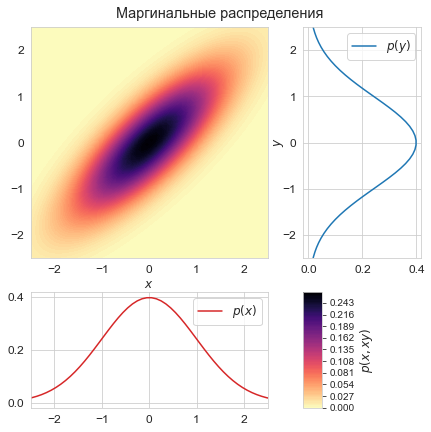

In [12]:
# Plot the conditional distributions
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace=0., hspace=0.)
plt.suptitle('Маргинальные распределения', y=0.92)

# Plot surface on top left
ax1 = plt.subplot(gs[0])
x, y, p = generate_surface(mean, cov, d)
# Plot bivariate distribution
con = ax1.contourf(x, y, p, 100, cmap=cm.magma_r)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.yaxis.set_label_position('right')
ax1.axis([-2.5, 2.5, -2.5, 2.5])

# Plot y
ax2 = plt.subplot(gs[1])
y = np.linspace(-5, 5, num=100)
py = univariate_normal(y, mean_y, Sigma_22)
# Plot univariate distribution
ax2.plot(py, y, '-', c=cm.tab10(0), label=f'$p(y)$')
ax2.legend(loc=0)
# ax2.set_xlabel('density')
ax2.set_ylim(-2.5, 2.5)

# Plot x
ax3 = plt.subplot(gs[2])
x = np.linspace(-5, 5, num=100)
px = univariate_normal(x, mean_x, Sigma_11)
# Plot univariate distribution
ax3.plot(x, px, '-', c=cm.tab10(3), label=f'$p(x)$')
ax3.legend(loc=0)
# ax3.set_ylabel('density')
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-2.5, 2.5)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('$p(x, xy)$')
cbar.ax.tick_params(labelsize=10)
plt.show()

### Условные распределения ###

Условное распределение $\mathbf{x}$ при фиксированном $\mathbf{y}$ можно получить с помощью формулы Байеса
$$
    p(\mathbf{x}|\mathbf{y}) = \frac{p(\mathbf{x}, \mathbf{y})}{p(\mathbf{y})} \propto 
    \frac{\exp\left\{(\mathbf{x, y})^\top \Sigma^{-1} (\mathbf{x, y})\right\}}{\exp\left\{\mathbf{y}^\top \Sigma_{22}^{-1} \mathbf{y}\right\}} \label{eq:GP_bayes}\tag{1}.
$$

Оно также подчиняется нормальному закону:
$$ p(\mathbf{x}|\mathbf{y}) = \mathcal{N}(\mu_{x|y}, \Sigma_{x|y}) $$

с *условным математическим ожиданием*
$$ \mu_{x|y} = \mu_x + \Sigma_{12}\Sigma_{22}^{-1}(\mathbf{y}-\mu_y) \label{eq:GP_mean}\tag{2} $$

и *условной ковариационной матрицей*
$$ \Sigma_{x|y} = \Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{12}^\top. \label{eq:GP_cov}\tag{3} $$

Отметим, что условная ковариационная матрица не зависит от $\mathbf{y}$, а условное математическое ожидание является линейной функцией от $\mathbf{y}$.
Другими словами, выражение $\eqref{eq:GP_mean}$ определяет функцию *линейной регрессии* (зависимости условного математического ожидания вектора $\mathbf{x}$ от заданного значения случайного вектора $\mathbf{y}$), где $\Sigma_{12}\Sigma_{22}^{-1}$ &mdash; матрица коэффициентов регрессии.

Сдвиг математического ожидания можно рассматривать как невязку условной переменной $(\mathbf{y}-\mu_y)$, нормализованную с ковариационной матрицей условной переменной $\Sigma_{22}$ и преобразованную в пространство переменной $\mathbf{x}$. Последнее делается с помощью матрицы ковариаций между $\mathbf{x}$ и $\mathbf{y}$ &mdash; $\Sigma_{12}$.

**Теорема.** Условное математическое ожидание является проекцией на подпространство функций от случайных величин, стоящих в условии условного математического ожидания.

Построим условные распределения $p(x|y= 1.5)$ и $p(y|x=-1)$.

In [13]:
# Calculate x|y
y_condition = 1.5  # To condition on y
mean_xgiveny = mean_x + (Sigma_12 * (1/Sigma_22) * (y_condition - mean_y))
cov_xgiveny = Sigma_11 - Sigma_12 * (1/Sigma_22) * Sigma_12
print(f'mean_x|y={mean_xgiveny:0.2}, cov_x|y={cov_xgiveny:0.4}')

# Calculate y|x
x_condition = -1.  # To condition on x
mean_ygivenx = mean_y + (Sigma_12 * (1/Sigma_11) * (x_condition - mean_x))
cov_ygivenx = Sigma_22 - (Sigma_12 * (1/Sigma_11) * Sigma_12)
print(f'mean_y|x={mean_ygivenx:0.2}, cov_y|x={cov_ygivenx:0.4}')

mean_x|y=1.2, cov_x|y=0.36
mean_y|x=-0.8, cov_y|x=0.36


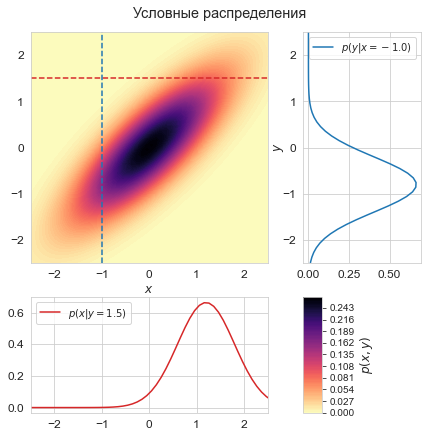

In [14]:
# Plot the conditional distributions
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(
    2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace=0., hspace=0.)
plt.suptitle('Условные распределения', y=0.93)

# Plot surface on top left
ax1 = plt.subplot(gs[0])
x, y, p = generate_surface(mean, cov, d)
# Plot bivariate distribution
con = ax1.contourf(x, y, p, 100, cmap=cm.magma_r)
# y=1 that is conditioned upon
ax1.plot([-2.5, 2.5], [y_condition, y_condition], '--', c=cm.tab10(3))
# x=-1. that is conditioned upon
ax1.plot([x_condition, x_condition], [-2.5, 2.5], '--', c=cm.tab10(0))
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.yaxis.set_label_position('right')
ax1.axis([-2.5, 2.5, -2.5, 2.5])

# Plot y|x
ax2 = plt.subplot(gs[1])
yx = np.linspace(-5, 5, num=100)
pyx = univariate_normal(yx, mean_ygivenx, cov_ygivenx)
# Plot univariate distribution
ax2.plot(pyx, yx, '-', c=cm.tab10(0), label=f'$p(y|x={x_condition:.1f})$')
ax2.legend(loc=0, fontsize=10)
# ax2.set_xlabel('density')
ax2.set_ylim(-2.5, 2.5)

# Plot x|y
ax3 = plt.subplot(gs[2])
xy = np.linspace(-5, 5, num=100)
pxy = univariate_normal(xy, mean_xgiveny, cov_xgiveny)
# Plot univariate distribution
ax3.plot(xy, pxy, '-', c=cm.tab10(3), label=f'$p(x|y={y_condition:.1f})$')
ax3.legend(loc=0, fontsize=10)
# ax3.set_ylabel('density')
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-2.5, 2.5)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('$p(x, y)$')
cbar.ax.tick_params(labelsize=10)
plt.show()

---

## Задания ##

1. Напишите функцию, осуществляющую разложение Холецкого симметричной положительно определённой матрицы $A = L L^\top$.
2. Применяя формулу Байеса ([1](#mjx-eqn-eq:GP_bayes)), получите формулы для условного математического ожидания ([2](#mjx-eqn-eq:GP_mean)) и условной ковариационной матрицы ([3](#mjx-eqn-eq:GP_cov)). *Подсказка*: используёте следующий результат для обращения блочной матрицы:
$$
\Sigma =
\begin{bmatrix}
    P & Q \\
    R & S
\end{bmatrix},
\quad
\Sigma^{-1} =
\begin{bmatrix}
    \tilde{P} & \tilde{Q} \\
    \tilde{R} & \tilde{S}
\end{bmatrix},
$$
где
$$
\begin{aligned}
    \tilde{P} &\;= \left(P-QS^{-1}R\right)^{-1}     & =\;& P^{-1} + P^{-1}Q\tilde{S}RP^{-1} \\
    \tilde{Q} &\;= -\tilde{P}QS^{-1}                & =\;& -P^{-1}Q\tilde{S} \\
    \tilde{R} &\;= -S^{-1}R\tilde{P}                & =\;& -\tilde{S}RP^{-1}  \\
    \tilde{S} &\;= S^{-1} + S^{-1}R\tilde{P}QS^{-1} & =\;& \left(S-RP^{-1}Q\right)^{-1}.
\end{aligned}
$$

---

## Литература ##

1. *Чернова Н.И.* Математическая статистика: Учеб. пособие &mdash; Новосиб. гос. ун-т, 2007. &mdash; 148 с.
1. *Ширяев А.Н.* Вероятность &mdash; 1. &mdash; М.: МЦНМО, 2007. &mdash; 517 с.
1. *Roelants P.* [Multivariate normal distribution](https://peterroelants.github.io/posts/multivariate-normal-primer/).
1. *Rasmussen C.E., Williams C.K.I.* [Gaussian Processes for Machine Learning](http://www.gaussianprocess.org/gpml/). &mdash; The MIT Press, 2006. &mdash; 248 p.

In [15]:
# Versions used
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))

Python: 3.7.11
numpy: 1.21.2
matplotlib: 3.4.2
seaborn: 0.11.2
